In [4]:
import os
os.listdir()


['.config', 'store-sales-time-series-forecasting.zip', 'sample_data']

In [5]:
!unzip -o store-sales-time-series-forecasting.zip


Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


In [6]:
import os
os.listdir()


['.config',
 'oil.csv',
 'stores.csv',
 'sample_submission.csv',
 'transactions.csv',
 'test.csv',
 'holidays_events.csv',
 'store-sales-time-series-forecasting.zip',
 'train.csv',
 'sample_data']

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
df['date'] = pd.to_datetime(df['date'])
df.head()



,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [8]:
daily_sales = df.groupby('date')['sales'].sum().reset_index()
daily_sales.head()


,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229


In [11]:
daily_sales['MA_7'] = daily_sales['sales'].rolling(window=7).mean()
daily_sales['MA_30'] = daily_sales['sales'].rolling(window=30).mean()


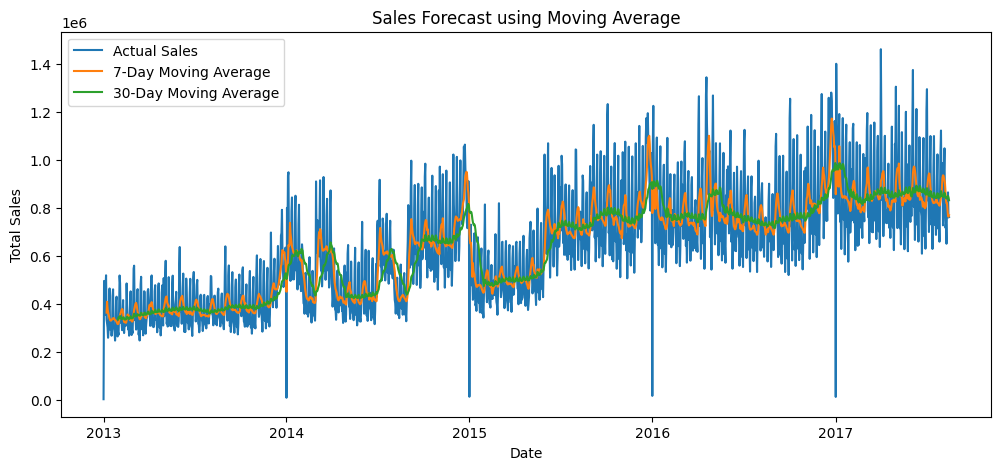

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(daily_sales['date'], daily_sales['sales'], label='Actual Sales')
plt.plot(daily_sales['date'], daily_sales['MA_7'], label='7-Day Moving Average')
plt.plot(daily_sales['date'], daily_sales['MA_30'], label='30-Day Moving Average')
plt.title("Sales Forecast using Moving Average")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()


Moving Average Forecast Summary

In this task, I used moving average techniques to analyze sales trends.
The 7-day moving average captures short-term variations, while the 30-day moving average highlights long-term trends.
This method smooths the data and helps in understanding overall sales direction.